## EDA understanding of your dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("../data/taxi_trip_pricing.csv")
df.head()

In [ ]:
df.info()


In [ ]:
df.describe()

In [ ]:
df.shape

In [ ]:
df.isna().sum()

## Choices of my features and label for the ML model

In [ ]:
selected_cols = [
    "Trip_Distance_km",
    "Trip_Duration_Minutes",
    "Time_of_Day",
    "Passenger_Count",
    "Trip_Price"

]

df_cleaned = df[selected_cols]

## EDA on the new data with graph display

In [ ]:
df_cleaned.hist(figsize=(10,8))
plt.show()

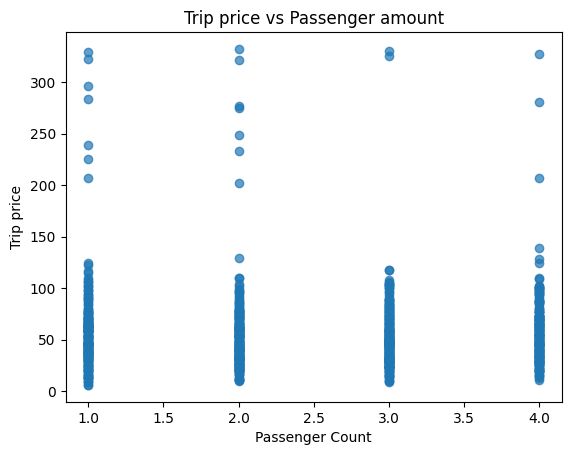

In [15]:
plt.figure()
plt.scatter(df_cleaned["Passenger_Count"], df_cleaned["Trip_Price"], alpha=0.7)
plt.title("Trip price vs Passenger amount")
plt.xlabel("Passenger Count")
plt.ylabel("Trip price")
plt.show()

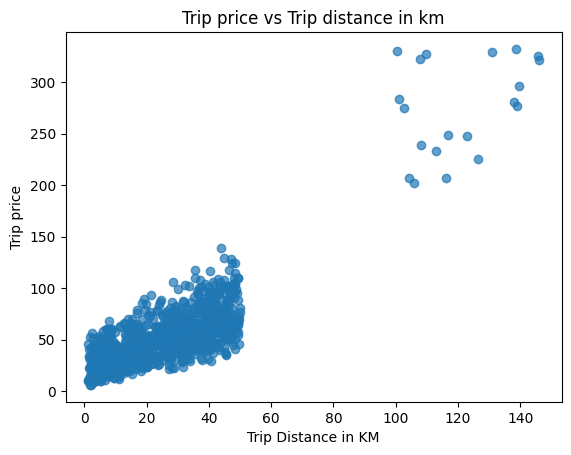

In [16]:
plt.figure()
plt.scatter(df_cleaned["Trip_Distance_km"], df_cleaned["Trip_Price"], alpha=0.7)
plt.title("Trip price vs Trip distance in km")
plt.xlabel("Trip Distance in KM")
plt.ylabel("Trip price")
plt.show()

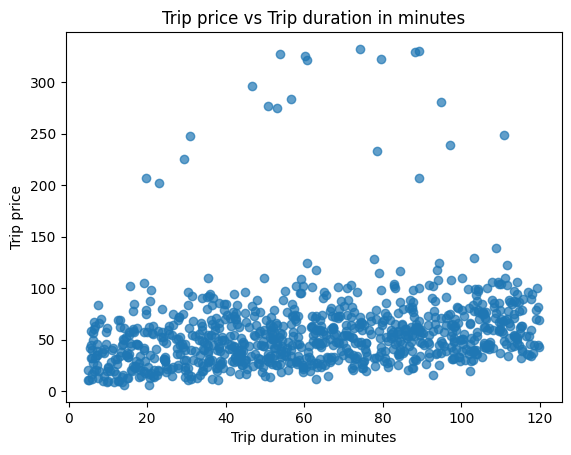

In [17]:
plt.figure()
plt.scatter(df_cleaned["Trip_Duration_Minutes"], df_cleaned["Trip_Price"], alpha=0.7)
plt.title("Trip price vs Trip duration in minutes")
plt.xlabel("Trip duration in minutes")
plt.ylabel("Trip price")
plt.show()